# Define a class for Linear Discriminant Analysis (LDA)
        # Step 1: Compute the mean vector for each class
        # Step 2: Compute within-class scatter matrix s_w
        [S_w = sumation_i=1 to  c (S_i) , s_i = sumation_x=Data_point_i to N ((x-m_i(x-m_i)^T))]
        # Step 3: Compute between-class scatter matrix                  S_b  =    {sumation_i= 1 to c (n_i * (m_i-m)(m_i-m)^T)}
        # Step 4: Solve the generalized eigenvalue problem for S_W^-1 * S_B
        # Step 5: Sort the eigenvalues and eigenvectors in decreasing order 
        # Step 6: Select the top n_components eigenvectors

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [41]:

class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None
        self.mean_vectors = None
        self.mean_LDA    = None
        
        
    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        
        self.mean_vectors = []
        for label in class_labels:
            mean_vector = np.mean(X[y == label], axis=0)
            self.mean_vectors.append(mean_vector)
            print(f"Mean vector for class {label}:\n{mean_vector}\n")
            
       
        
        
        S_W = np.zeros((n_features, n_features))
        for i, label in enumerate(class_labels):
            class_scatter = np.zeros((n_features, n_features))
            for row in X[y == label]:
                row, mv = row.reshape(n_features, 1), self.mean_vectors[i].reshape(n_features, 1)
                class_scatter += (row - mv).dot((row - mv).T)
            S_W += class_scatter
        print(f"Within-class scatter matrix (S_W):\n{S_W}\n")
        
        overall_mean = np.mean(X, axis=0)
        S_B = np.zeros((n_features, n_features))
        for i, label in enumerate(class_labels):
            n = X[y == label].shape[0]
            mean_vec = self.mean_vectors[i].reshape(n_features, 1)
            overall_mean_vec = overall_mean.reshape(n_features, 1)
            S_B += n * (mean_vec - overall_mean_vec).dot((mean_vec - overall_mean_vec).T)
        print(f"Between-class scatter matrix (S_B):\n{S_B}\n")
        
        eig_values, eig_vectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
        
        sorted_indices = np.argsort(abs(eig_values))[::-1]
        eig_values = eig_values[sorted_indices]
        eig_vectors = eig_vectors[:, sorted_indices]
        
        print(f"Eigenvalues:\n{eig_values}\n")
        print(f"Eigenvectors:\n{eig_vectors}\n")
        
        self.eigenvalues = eig_values[:self.n_components]
        self.eigenvectors = eig_vectors[:, :self.n_components]

    
    def transform(self, X):
        return np.dot(X, self.eigenvectors)
    
    

    
    


   

# Define a class for Principal Component Analysis (PCA)
        # Standardize the data
        # Compute covariance matrix
        # Compute eigenvalues and eigenvectors
        # Sort eigenvectors by eigenvalues
        # Select the top n_components eigenvectors
        # pca = X_standardize * n_components eigenvectors


In [42]:
# Define a class for Principal Component Analysis (PCA)
class MyPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None

    def fit(self, X):
        X = StandardScaler().fit_transform(X)

        covariance_matrix = np.cov(X.T)

        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        self.components_ = eigenvectors[:, :self.n_components]

    def transform(self, X):
        return X.dot(self.components_)
    
    


In [43]:
# Main function to execute LDA and PCA on the Iris dataset
def main():
    # Load Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target
    labels = iris.target_names

    # Standardize the dataset
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Apply LDA
    lda = LDA(n_components=2)
    lda.fit(X_standardized, y)
    X_lda = lda.transform(X_standardized)
    
    
    # Apply PCA
    pca = MyPCA(n_components=2)
    pca.fit(X_standardized)
    X_pca = pca.transform(X_standardized)
    
    lda_means = []        
    for label in np.unique(y):
        mean_lda = np.mean(X_lda[y == label], axis=0)
        lda_means.append(mean_lda)
        print(f"Mean for class {label} in LDA space (LDA1, LDA2): {lda_means}")
    

    
    # Visualize LDA result
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    for label, color in zip(np.unique(y), colors):
        plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=labels[label], color=color)
    plt.title('LDA: Iris dataset projection')
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Visualize PCA result
    plt.figure(figsize=(8, 6))
    for label, color in zip(np.unique(y), colors):
        plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=labels[label], color=color)
    plt.title('PCA: Iris dataset projection')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
    
    
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)


lda_means = np.array(lda_means)
plt.scatter(lda_means[:, 0], lda_means[:, 1], color='red', marker='x', s=100, label='Class Means')

for i, label in enumerate(np.unique(y)):
    plt.annotate(f"Mean {label}", (lda_means[i, 0], lda_means[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')

plt.title('LDA Projection of Iris Dataset with Class Means')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.colorbar(scatter)
plt.show()
    


NameError: name 'X_lda' is not defined

<Figure size 800x600 with 0 Axes>

Mean vector for class 0:
[-1.01457897  0.85326268 -1.30498732 -1.25489349]

Mean vector for class 1:
[ 0.11228223 -0.66143204  0.28532388  0.1667341 ]

Mean vector for class 2:
[ 0.90229674 -0.19183064  1.01966344  1.08815939]

Within-class scatter matrix (S_W):
[[57.19414039 38.01741201 16.95864185  9.00354437]
 [38.01741201 89.88257294 10.62508571 14.57007861]
 [16.95864185 10.62508571  8.79424214  4.69233162]
 [ 9.00354437 14.57007861  4.69233162 10.66756048]]

Between-class scatter matrix (S_B):
[[ 92.80585961 -55.65287963 113.80442453 113.68762457]
 [-55.65287963  60.11742706 -74.89110136 -69.48896849]
 [113.80442453 -74.89110136 141.20575786 139.73748309]
 [113.68762457 -69.48896849 139.73748309 139.33243952]]

Eigenvalues:
[3.21919292e+01+0.00000000e+00j 2.85391043e-01+0.00000000e+00j
 2.01765204e-15-1.01974109e-15j 2.01765204e-15+1.01974109e-15j]

Eigenvectors:
[[ 0.15128777+0.j          0.00693578+0.j          0.7248664 -0.j
   0.7248664 +0.j        ]
 [ 0.14733266+0.j        

c:\Users\FAIZ SIDDIQUI\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\FAIZ SIDDIQUI\anaconda3\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


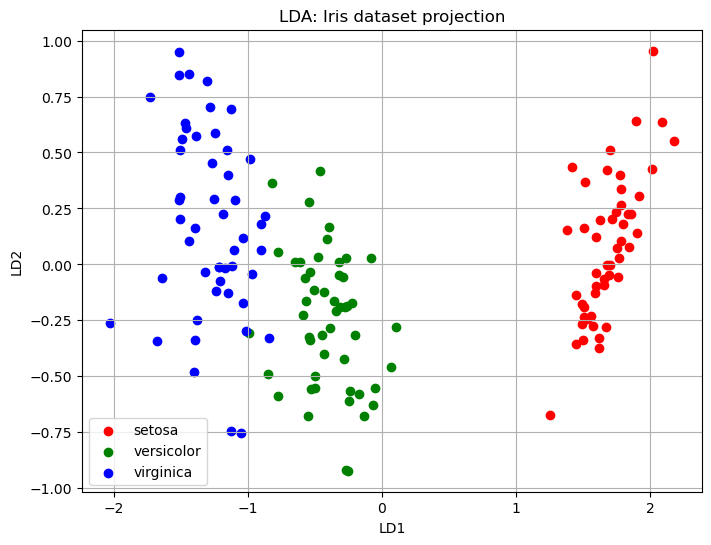

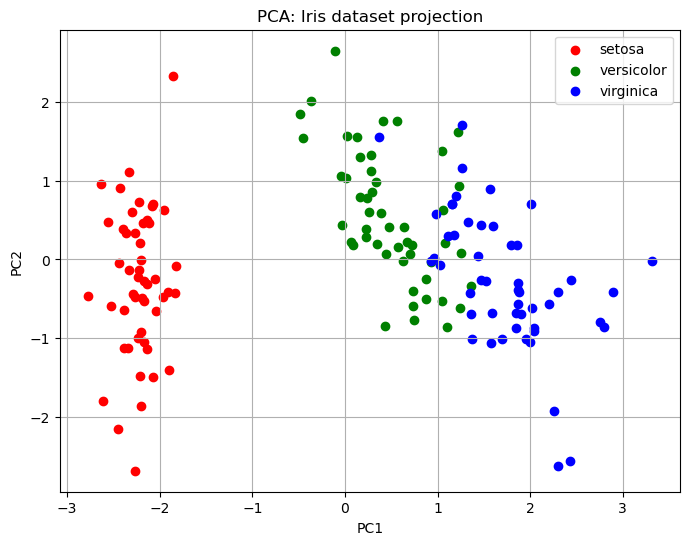

In [20]:
# Run the main function
if __name__ == "__main__":
    main()
